### Activity Parameter

We now add one parameter in our model, to capture the fact that activity in the platform is not equal among all workers.

In most online platforms, activity follows a power-law distribution: Most people participate occassionally, but a small number of users are active substantially more. 

We endow each of our user with an activity parameter $a$, which defines the fraction of time units that the user devotes in the platform. We asumme that $a$ is power-law distributed, based on evidence from other online platforms, and from our numbers above. Assuming that a user is active a minimum of $x_{min}$ and a maximum of $x_{max}$ time units, we have that the probability distribution of the activity parameters for the workers follows the distribution:

* pdf: $p(a=x) = C \cdot x^\alpha$, with $C=(\alpha-1) / (x_{max}^{\alpha-1} - x_{min}^{\alpha-1})$

* CDF: $P(x>a) =  (x^{\alpha-1} - x_{min}^{\alpha-1}) /  (x_{max}^{\alpha-1} - x_{min}^{\alpha-1})$

$E[x] = \frac{\alpha − 1}{\alpha - 2}$ for $\alpha>2$. See http://tuvalu.santafe.edu/~aaronc/courses/7000/csci7000-001_2011_L2.pdf (Eq 3) and http://up-rs-esp.github.io/bpl/

So, if we have a population of $N$ users (not all of them active at the same time, though), at any given minute, we can expect $N \frac{\alpha − 1}{\alpha - 2}$ of them to be available for sampling at any given moment, and our estimates need to be adjusted by multiplying our earlier estimates with  $\frac{\alpha − 2}{\alpha - 1}$.

#### Generally-active vs Active-now population

If we pick a random time to sample, then the probability that a user is active is given by $a\cdot p(a)$, where $a$ is the level of activity for that user, and $p(a)$ is the probability that a user has such an activity level.

Integrating over all activity values:

$\int_0^1 a^2 p(a) da = E[a^2]$


In [8]:
# Create the overall population: Sample N users and give to each an activity/propensity value a

# Compute the average number of people that we expect to be active during that time. 
# That is the mean value of the distribution

# ===================

# Capture period

# Draw user from the population

# If user is active (random<a) proceed, else go to step 2

# Sample the user with probability 1/active users, and add id in the list

# Re-Capture period

# Repeat as above and compute estimate of population using the Lincoln estimator



In [9]:
# To instantiate using various probability functions take a look at 
# https://docs.scipy.org/doc/scipy/reference/stats.html
import numpy as np
from scipy.stats import beta

N = 500000
a = 1000
b = 1000
rvs = beta.rvs(a, b, size=N)

# This transformation can help us transform any continuous RV 
# into a value ranging from 0 to 1
# p = [math.exp(rv)/(1+math.exp(rv)) for rv in rvs]
# The scipy.stats.rv_histogram should help us then transform the empirical
# values into an empirical distribution

mean, var, skew = beta.stats(a, b,  moments='mvs')
# For powerlaw on a bounded interval 0..1, it is a special case of Beta with b=1

print("Mean:", mean)
print("Var:", var)
print("Skew:", skew)
print("X1:", mean)
print("X2:", var+mean*mean)
print("X3:", skew*var*np.sqrt(var) + 3*mean*var + mean*mean*mean )
print("Common:", var+mean*mean)

factor = (var+mean*mean) / (mean*mean)
factor2 = (skew*var*np.sqrt(var) + 3*mean*var + mean*mean*mean) / ((var+mean*mean)*mean)
print("Factor:", factor )
print("Factor2:", factor2 )

Mean: 0.5
Var: 0.0001249375312343828
Skew: 0.0
X1: 0.5
X2: 0.250124937531
X3: 0.125187406297
Common: 0.250124937531
Factor: 1.00049975012
Factor2: 1.000999001


In [10]:
sum(rvs)

249999.6594603963

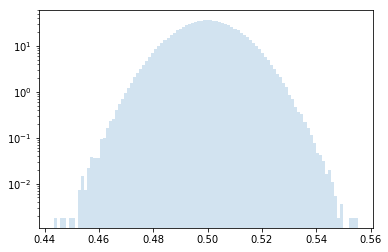

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.hist(rvs, normed=True, histtype='stepfilled', alpha=0.2, bins=100)
ax.set_yscale("log")

In [12]:
import numpy as np
# Given an instantiated list of propensity values 
# the mean of the distribution, and a sample target n, return the ids of the sampled entities
def sample(rvs, n):
    return sorted(np.random.choice(len(rvs), size = n, replace=True, p=rvs/sum(rvs)))


In [15]:
import statistics
from collections import Counter

samples = 3
tries = 100
adj_estimates = []
naive_estimates = []
for _ in range(tries):
    n = 10000
    
    #sampled_ids = []
    #for _ in range(samples):
    #    s = set(sample(rvs, n))
    #    sampled_ids.extend(s)
    #z = Counter(Counter(sampled_ids).values())
        
    
    id1 = set(sample(rvs, n))
    id2 = set(sample(rvs, n))
    #id3 = set(sample(rvs, n))
    common = list(id1 & id2)
    #triad = list(id1 & id2 & id3)
    
    # Need to figure out a proper way to handle this
    # Skipping is biasing the results
    #if len(common) == 0:
    #    continue
      
    naive_estimate = len(id1) * len(id2) / len(common)
    #naive_estimate = len(common) * len(id3) / len(triad)
    naive_estimates.append(naive_estimate)
    
    adj_estimate = naive_estimate * factor2
    adj_estimates.append(adj_estimate)                       
    
print("Naive Median:", statistics.median(naive_estimates))
print("Naive Mean:", statistics.mean(naive_estimates))
                                 
print("Adj Median:", statistics.median(adj_estimates))
print("Adj Mean:", statistics.mean(adj_estimates))

Naive Median: 496030.32314259344
Naive Mean: 497235.5805292975
Adj Median: 496525.857931
Adj Mean: 497732.319371


(array([  2.78980926e-06,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.78980926e-06,   0.00000000e+00,
          2.78980926e-06,   0.00000000e+00,   0.00000000e+00,
          1.11592370e-05,   5.57961852e-06,   2.78980926e-06,
          2.78980926e-06,   2.78980926e-06,   5.57961852e-06,
          8.36942778e-06,   5.57961852e-06,   1.11592370e-05,
          8.36942778e-06,   2.78980926e-06,   5.57961852e-06,
          1.95286648e-05,   1.39490463e-05,   1.11592370e-05,
          1.39490463e-05,   1.39490463e-05,   1.67388556e-05,
          5.57961852e-06,   1.39490463e-05,   1.11592370e-05,
          2.78980926e-06,   0.00000000e+00,   5.57961852e-06,
          0.00000000e+00,   1.67388556e-05,   8.36942778e-06,
          5.57961852e-06,   5.57961852e-06,   2.78980926e-06,
          1.39490463e-05,   1.11592370e-05,   0.00000000e+00,
          2.78980926e-06,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

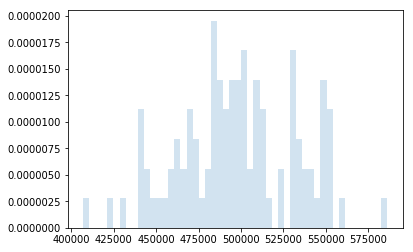

In [16]:
fig, ax = plt.subplots(1, 1)
ax.hist(adj_estimates, normed=True, histtype='stepfilled', alpha=0.2, bins=50)

In [17]:
from collections import Counter
sampled_ids = []
samples = 26
for _ in range(samples):
    s = set(sample(rvs, n))
    sampled_ids.extend(s)
z = Counter(Counter(sampled_ids).values())
z

Counter({1: 156473, 2: 39204, 3: 6373, 4: 758, 5: 73, 6: 6})

In [21]:
for i in z.keys():
    print(i, z[i]/N, z[i+1]/z[i])

1 0.312946 0.2505480178688975
2 0.078408 0.16255994286297318
3 0.012746 0.11893927506668758
4 0.001516 0.09630606860158311
5 0.000146 0.0821917808219178
6 1.2e-05 0.0
